# Generate scRNA-Seq data using scBoolSeq

Extends https://github.com/bnediction/scBoolSeq-supplementary/blob/main/synthetic%20scRNA-Seq%20from%20Random%20Network.ipynb

In [1]:
import mpbn
import bonesis
import booleantraces as btrace
from colomoto.minibn import *
import pandas as pd

### Load synthetic Boolean network and associated configurations

# computing graph layout...


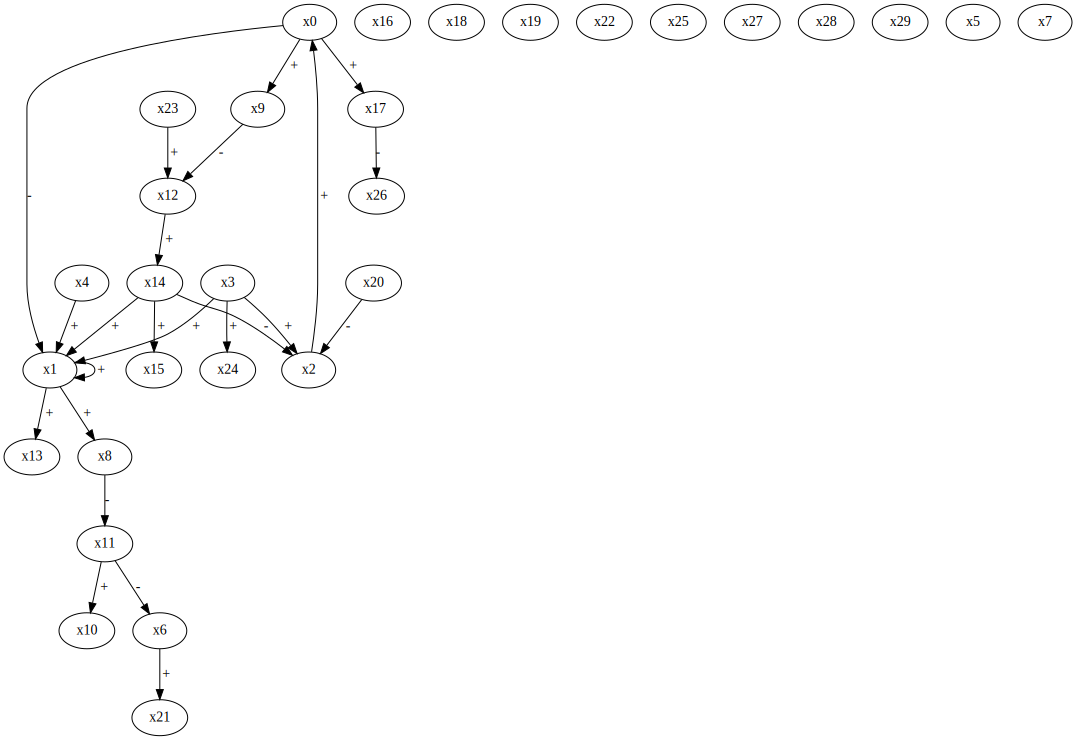

In [2]:
f = mpbn.load("boolean-network.bnet")
f_ig = f.influence_graph()
f_ig

In [34]:
mpbn.expr()

TypeError: expr() missing 1 required positional argument: 'obj'

In [12]:
mpbn.expr2bpy("boolean-network.bnet")

TypeError: expr2bpy() missing 1 required positional argument: 'ba'

In [5]:
import ginsim
import biolqm

model = biolqm.load('./boolean-network.bnet')
model = biolqm.to_ginsim(model)


In [4]:
model = biolqm.load('./boolean-network.bnet')


# computing graph layout...


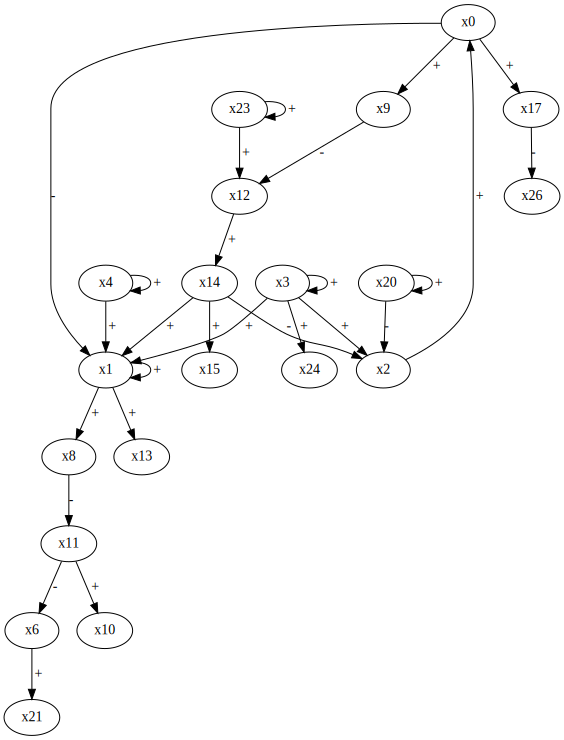

In [6]:
net = bonesis.InfluenceGraph.from_ginsim(model, exact = True)


In [36]:
node_list = list(net.nodes)

In [90]:
confs = pd.read_csv("configurations.csv", index_col=0)
confs.head()

,steady3,bifurcation,init,steady2,steady1
x0,0,0,0,0,1
x2,0,0,1,0,1
x3,0,0,1,0,0
x4,0,1,1,0,0
x7,0,0,0,0,0


## Generation of Boolean trajectories

In [59]:
wt_pairs = [("init", "steady1"),
            ("init", "bifurcation"),
                ("bifurcation", "steady2"),
                ("bifurcation", "steady3")]
traj_df = pd.concat([btrace.labelled_trajectory(f, confs[a], confs[b], a, b) for (a,b) in wt_pairs])
traj_df = traj_df.drop_duplicates()
traj_df.shape

Grounding...done in 0.1s
Grounding...done in 0.0s
Grounding...done in 0.1s
Grounding...done in 0.0s


(52, 30)

In [60]:
traj_df = traj_df[node_list]
traj_df

,x17,x26,x4,x1,x20,x2,x11,x10,x6,x13,x8,x14,x15,x9,x12,x23,x3,x24,x21,x0
init,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1,1,1,0,0
init_to_steady1_1,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0,1,1,1,0,0
init_to_steady1_2,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0,1,1,1,0,1
init_to_steady1_3,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0,1,1,1,0,1
init_to_steady1_4,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,1
init_to_steady1_5,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,1
init_to_steady1_6,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,1
init_to_steady1_7,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0,1
init_to_steady1_8,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1
init_to_steady1_9,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1


In [61]:
data = traj_df.loc[['init','steady1','bifurcation','steady2','steady3']].to_dict(orient = 'index')

In [105]:
confs = pd.read_csv("configurations.csv", index_col=0)
confs = confs.loc[node_list]
confs = confs.to_dict()

In [110]:
confs

{'steady3': {'x17': 0,
  'x26': 1,
  'x4': 0,
  'x1': 1,
  'x20': 0,
  'x2': 0,
  'x11': 0,
  'x10': 0,
  'x6': 1,
  'x13': 1,
  'x8': 1,
  'x14': 1,
  'x15': 1,
  'x9': 0,
  'x12': 1,
  'x23': 0,
  'x3': 0,
  'x24': 0,
  'x21': 1,
  'x0': 0},
 'bifurcation': {'x17': 1,
  'x26': 1,
  'x4': 1,
  'x1': 0,
  'x20': 0,
  'x2': 0,
  'x11': 0,
  'x10': 1,
  'x6': 1,
  'x13': 1,
  'x8': 0,
  'x14': 1,
  'x15': 0,
  'x9': 0,
  'x12': 1,
  'x23': 1,
  'x3': 0,
  'x24': 1,
  'x21': 0,
  'x0': 0},
 'init': {'x17': 0,
  'x26': 1,
  'x4': 1,
  'x1': 0,
  'x20': 1,
  'x2': 1,
  'x11': 0,
  'x10': 1,
  'x6': 1,
  'x13': 1,
  'x8': 0,
  'x14': 1,
  'x15': 0,
  'x9': 0,
  'x12': 0,
  'x23': 1,
  'x3': 1,
  'x24': 1,
  'x21': 0,
  'x0': 0},
 'steady2': {'x17': 0,
  'x26': 1,
  'x4': 0,
  'x1': 0,
  'x20': 0,
  'x2': 0,
  'x11': 1,
  'x10': 1,
  'x6': 0,
  'x13': 0,
  'x8': 0,
  'x14': 1,
  'x15': 1,
  'x9': 0,
  'x12': 1,
  'x23': 0,
  'x3': 0,
  'x24': 0,
  'x21': 0,
  'x0': 0},
 'steady1': {'x17': 1,


In [106]:
bo = bonesis.BoNesis(net,confs)

In [107]:
# Fixed points
bo.fixed(~bo.obs("steady1"))
bo.fixed(~bo.obs("steady2"))
bo.fixed(~bo.obs("steady3"));

In [123]:
bo.reach('init','steady1')

TypeError: Invalid arguments for reach

In [111]:
# Trajectory
~bo.obs("init") >= ~bo.obs("steady1");

In [112]:
solutions = list(bo.boolean_networks(limit = 1000))
len(solutions)

Grounding...done in 0.0s


0

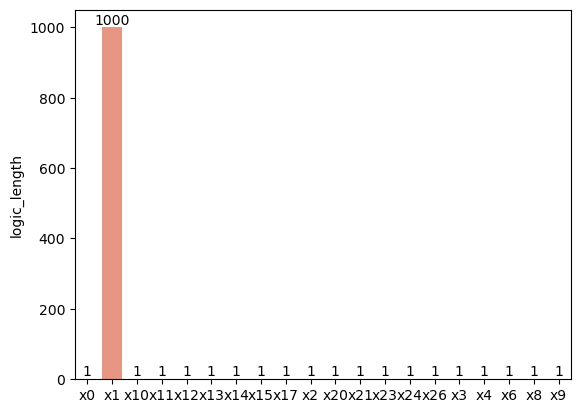

In [89]:
var_logic = pd.DataFrame(solutions)
var_logic_length = []
for i in var_logic.columns:
    num_logic = var_logic[i].value_counts().size
    var_logic_length.append(num_logic)
var_logic_length = pd.DataFrame(var_logic_length, columns = ['logic_length'], index = var_logic.columns)

import seaborn as sns
ax = sns.barplot(x = var_logic_length.index, 
            y = var_logic_length.logic_length)
ax.bar_label(ax.containers[0], fontsize=10);